In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
ROCK,PAPER,SCISSORS = 0,1,2
NUM_ACTIONS = 3 #How many actions a player can take
regretSum = np.zeros(NUM_ACTIONS, dtype=np.float64)
strategySum = np.zeros(NUM_ACTIONS, dtype=np.float64)
strategy = np.array([0.0, 0.0, 0.0]) #define strategy of the player (to start)
oppStrategy = np.array([0.4, 0.3, 0.3]) #define strategy of the opponent (to start)

In [3]:
def value(p1, p2):
    if p1 == p2:
        return 0
    elif p1 == ROCK and p2 == SCISSORS:
        return 1
    elif p1 == SCISSORS and p2 == PAPER:
        return 1
    elif p1 == PAPER and p2 == ROCK:
        return 1
    else:
        return -1

In [4]:
#accumulates in strategySum
def getStrategy():
    global regretSum, strategySum
    strategy = np.maximum(regretSum, 0)
    normalizingSum = np.sum(strategy)
    if normalizingSum > 0:
        strategy /= normalizingSum
    else:
        strategy = np.ones(NUM_ACTIONS) / NUM_ACTIONS
    strategySum += strategy
    return strategy

In [5]:
def getAction(strategy):
    strategy = strategy / np.sum(strategy) #normalize
    rr = random.random()
    return np.searchsorted(np.cumsum(strategy), rr)

In [6]:
def train(iterations):
    global regretSum
    actionUtility = np.zeros(NUM_ACTIONS)
    for i in range(iterations):
        strategy = getStrategy()
        myAction = getAction(strategy)
        otherAction = getAction(oppStrategy)
        #for rock paper scissors
        actionUtility[otherAction] = 0
        actionUtility[(otherAction + 1) % NUM_ACTIONS] = 1
        actionUtility[(otherAction - 1) % NUM_ACTIONS] = -1
        
        regretSum += actionUtility - actionUtility[myAction]

In [7]:
#uses strategySum
def getAverageStrategy():
    global strategySum
    normalizingSum = np.sum(strategySum)
    if normalizingSum > 0:
        avgStrategy = strategySum / normalizingSum
    else:
        avgStrategy = np.ones(NUM_ACTIONS) / NUM_ACTIONS
    return avgStrategy

In [8]:
train(100000)
getAverageStrategy()

array([8.93002366e-04, 9.98753035e-01, 3.53962641e-04])

([<matplotlib.lines.Line2D at 0x11df1d700>], 100.64)

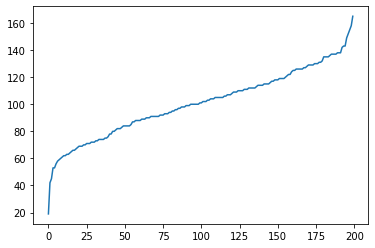

In [9]:
#here we are not exploiting at all... just testing the methods
vvv = []
for j in range(200):
    vv = 0
    for i in range(1000):
        strategy = getStrategy()
        #strategy = np.array([0,1,0]) #only throw paper, should be the optimal strategy for an agent that favours rock
        myAction = getAction(strategy)
        otherAction = getAction(oppStrategy)
        vv += value(myAction, otherAction)
    vvv.append(vv)
#plt.hist(vvv, bins = 10)
plt.plot(sorted(vvv)), np.mean(vvv)